## 2.信用情報


Kaggleの Home Credit Default Risk コンペティションの学習および推定を行います。

[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)


#### 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

- 何を学習し、何を予測するのか
- どのようなファイルを作りKaggleに提出するか
- 提出されたものはどういった指標値で評価されるのか

### 3.ベースラインモデルの作成


まずは単純な方法による ベースラインモデル　を作成します。精度の基準となるモデルです。

精度を高くする必要はありません。エラーなく実行でき、Kaggle側に推定値を提出できることを目指します。

#### 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [349]:
df = pd.read_csv('application_train.csv')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [315]:
df.shape

(307511, 122)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [5]:
df_null = df.isnull().sum()
df_null[df_null>0].sort_values(ascending=False).head(10)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64

In [6]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

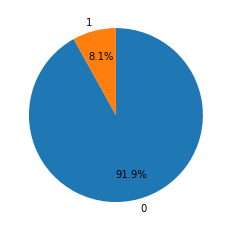

In [7]:
label = ['0','1']
 
plt.pie(df['TARGET'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

- 説明変数がものすごく多いことがわかる。
- 欠損値も視覚的にみたときにものすごくあることがわかる。
- 返済できている人の割合が多い

#### 借入と収入の関係

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

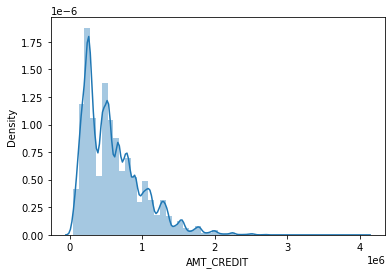

In [8]:
sns.distplot(df["AMT_CREDIT"])

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

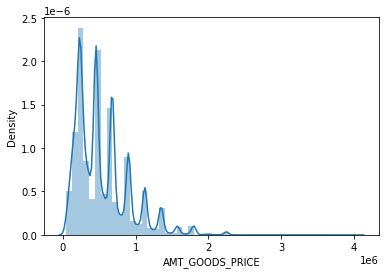

In [9]:
sns.distplot(df["AMT_GOODS_PRICE"])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

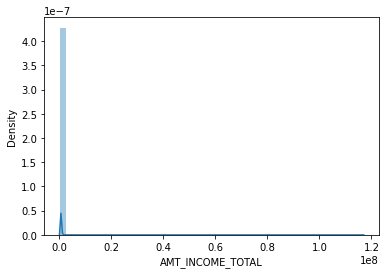

In [10]:
sns.distplot(df["AMT_INCOME_TOTAL"])

In [11]:
df["AMT_INCOME_TOTAL"].sort_values(ascending=False).head(10)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
103006      4500000.0
204564      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
Name: AMT_INCOME_TOTAL, dtype: float64

#### 男女別

<AxesSubplot:xlabel='TARGET'>

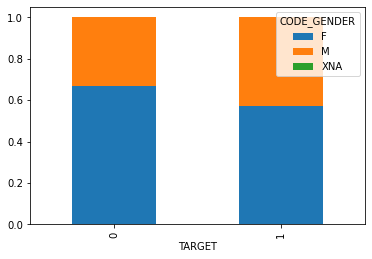

In [12]:
sex = pd.crosstab(df['TARGET'], df['CODE_GENDER'], normalize='index')
sex.plot.bar(stacked=True)

デフォルトしている人は女性比率が少し高い。

<AxesSubplot:xlabel='TARGET'>

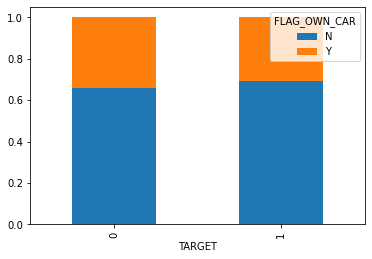

In [13]:
car = pd.crosstab(df['TARGET'], df['FLAG_OWN_CAR'], normalize='index')
car.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

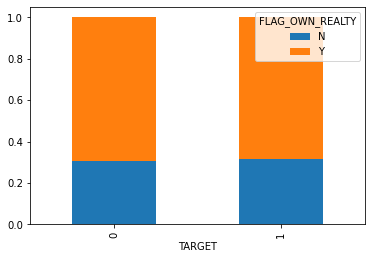

In [14]:
realty = pd.crosstab(df['TARGET'], df['FLAG_OWN_REALTY'], normalize='index')
realty.plot.bar(stacked=True)

車と家の割合は同じぐらいである。

#### 年齢

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Density'>

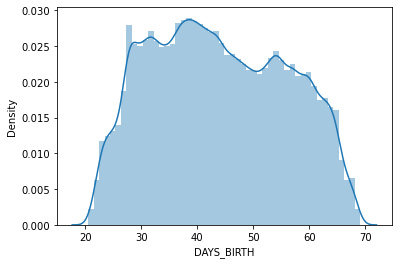

In [15]:
age = df["DAYS_BIRTH"]/-365
sns.distplot(age)

#### 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [16]:
total = df.isnull().sum().sort_values(ascending=False)
total[total>0].index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

In [17]:
cols = ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE']

In [18]:
for i in cols:
    df[i].fillna('None',inplace=True)

In [19]:
df["COMMONAREA_MEDI"].head(50
                                 ).value_counts()


None      36
0.115      1
0.0144     1
0.0827     1
0.0531     1
0.0057     1
0.0018     1
0.012      1
0.0585     1
0.0143     1
0.0214     1
0.1071     1
0.0608     1
0.001      1
0.0189     1
Name: COMMONAREA_MEDI, dtype: int64

In [20]:
total = df.isnull().sum().sort_values(ascending=False)
total.head()

SK_ID_CURR                  0
OBS_30_CNT_SOCIAL_CIRCLE    0
WALLSMATERIAL_MODE          0
TOTALAREA_MODE              0
HOUSETYPE_MODE              0
dtype: int64

In [21]:
num_data = df.dtypes[df.dtypes !="object"].index
num_data

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20

In [22]:
for i in num_data:
    print("{:35}".format(i), 
          "S:{:07.2f}".format(df[i].skew())," ","K:{:08.2f}".format(df[i].kurt()))

SK_ID_CURR                          S:-000.00   K:-0001.20
TARGET                              S:0003.08   K:00007.48
CNT_CHILDREN                        S:0001.97   K:00007.90
AMT_INCOME_TOTAL                    S:0391.56   K:191786.55
AMT_CREDIT                          S:0001.23   K:00001.93
REGION_POPULATION_RELATIVE          S:0001.49   K:00003.26
DAYS_BIRTH                          S:-000.12   K:-0001.05
DAYS_EMPLOYED                       S:0001.66   K:00000.77
DAYS_REGISTRATION                   S:-000.59   K:-0000.32
DAYS_ID_PUBLISH                     S:0000.35   K:-0001.11
FLAG_MOBIL                          S:-554.54   K:307511.00
FLAG_EMP_PHONE                      S:-001.66   K:00000.77
FLAG_WORK_PHONE                     S:0001.50   K:00000.26
FLAG_CONT_MOBILE                    S:-023.08   K:00530.74
FLAG_PHONE                          S:0000.97   K:-0001.05
FLAG_EMAIL                          S:0003.83   K:00012.69
REGION_RATING_CLIENT                S:0000.09   K:0000

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

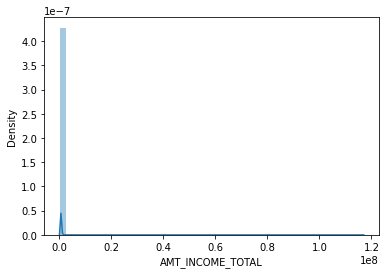

In [23]:
sns.distplot(df["AMT_INCOME_TOTAL"])

In [24]:
df["INCOME_log"] = np.log(df["AMT_INCOME_TOTAL"])

In [25]:
df.drop("AMT_INCOME_TOTAL", inplace= True, axis = 1)

In [26]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_log
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,None,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,...,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,12.218495
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,None,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,None,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,12.506177
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,None,0.555912,0.729567,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,11.119883
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,None,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,None,0.650442,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,None,None,None,11.813030
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompa

In [27]:
num_df = df[['SK_ID_CURR','INCOME_log', 'CNT_CHILDREN',
       'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [29]:
X_train,X_test,y_train,y_test =train_test_split(num_df.values,
                 df['TARGET'].values,random_state=0)

In [30]:
scx = StandardScaler()
X_train_st = scx.fit_transform(X_train)
X_test_st = scx.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [32]:
lr = LogisticRegression(max_iter=10000)

In [33]:
lr.fit(X_train_st,y_train)

LogisticRegression(max_iter=10000)

In [34]:
y_pre = lr.predict_proba(X_test_st)

In [35]:
y_pre

array([[0.91673826, 0.08326174],
       [0.94420448, 0.05579552],
       [0.96571243, 0.03428757],
       ...,
       [0.94068532, 0.05931468],
       [0.88300184, 0.11699816],
       [0.8860799 , 0.1139201 ]])

In [326]:
from sklearn.metrics import roc_auc_score

In [37]:
y_test.shape

(76878,)

In [38]:
y_pre.shape

(76878, 2)

In [39]:
roc_auc_score(y_test,y_pre[:,1])

0.6395857074369056

#### 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。

正しく提出が行えていれば、精度は低くても構いません。

In [380]:
test = pd.read_csv("application_test.csv")

In [381]:
test.shape

(48744, 121)

In [382]:
num_df.shape

(307511, 44)

In [383]:
test["income_log"] = np.log(test["AMT_INCOME_TOTAL"])

In [384]:
test = test.drop(["AMT_INCOME_TOTAL"],axis=1)

In [44]:
test_num = test[['SK_ID_CURR',"income_log",'CNT_CHILDREN',
       'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']]

In [45]:
X_test_ap = scx.transform(test_num)

In [46]:
y_pre2 = lr.predict_proba(X_test_ap)

In [47]:
type(y_pre2[:,1])

numpy.ndarray

In [48]:
y_pre2.shape

(48744, 2)

In [49]:
test["SK_ID_CURR"].shape

(48744,)

In [50]:
type(test)

pandas.core.frame.DataFrame

In [51]:
y_pre2_pd = pd.Series(y_pre2[:,1])
y_pre2_pd

0        0.070318
1        0.077152
2        0.047991
3        0.060013
4        0.122019
           ...   
48739    0.064497
48740    0.115706
48741    0.079556
48742    0.123178
48743    0.110780
Length: 48744, dtype: float64

In [52]:
id = pd.Series(test["SK_ID_CURR"])

In [53]:
id.head()

0    100001
1    100005
2    100013
3    100028
4    100038
Name: SK_ID_CURR, dtype: int64

In [54]:
df1 = pd.concat([id,y_pre2_pd],axis=1)

In [55]:
df1.head()

,SK_ID_CURR,0
0,100001,0.070318
1,100005,0.077152
2,100013,0.047991
3,100028,0.060013
4,100038,0.122019


In [56]:
df2 = df1.rename(columns={0: 'TARGET'})

In [57]:
df2.to_csv("submission.csv",index=False)

#### kaggleの点数は0.64

### 4.特徴量エンジニアリング


ベースラインモデルを元に、入力する特徴量に様々な工夫を行い精度を向上させていきます。

#### 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

どの特徴量を使うか
どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。

精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

In [58]:
num_df.head()

,SK_ID_CURR,INCOME_log,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,12.218495,0,406597.5,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,12.506177,0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,11.119883,0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,11.813030,0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,11.707670,0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,11,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
test_num.head()

,SK_ID_CURR,income_log,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100001,11.813030,0,568800.0,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,2,2,18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100005,11.502875,0,222768.0,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,2,2,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100013,12.218495,0,663264.0,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,2,2,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100028,12.660328,2,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,2,2,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100038,12.100712,1,625500.0,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,2,2,5,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
obj_test = test.dtypes[test.dtypes=="object"].index
obj_test


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [61]:
obj_data = df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']]
obj_data.shape

(307511, 16)

In [62]:
obj_test = test[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']]
obj_test.shape


(48744, 16)

In [63]:
df_ob = pd.concat([obj_data,obj_test])

In [64]:
df2 = pd.get_dummies(df_ob)

In [65]:
df2.shape

(356255, 146)

In [66]:
df_test2 = df2[0:48744]
df_test2.shape


(48744, 146)

In [67]:
df_obj2 = df2[48744:]
df_obj2.shape

(307511, 146)

In [68]:
num_df.shape

(307511, 44)

In [69]:
df_train = pd.concat([num_df,df_obj2,df["TARGET"]],axis=1)
df_train.shape

(307511, 191)

In [70]:
df_test = pd.concat([test_num,df_test2],axis=1)
df.shape

(307511, 122)

In [71]:
df_train = df_train.dropna(how='any')

In [72]:
df_test.isnull()

,SK_ID_CURR,income_log,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,...,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_None,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_None,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_None,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_None,EMERGENCYSTATE_MODE_Yes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [73]:
df_test = df_test.dropna(how="any")

In [74]:
df_train2 = df_train.drop("TARGET",axis=1)

In [133]:
X_train2,X_test2,y_train2,y_test2 =train_test_split(df_train2.values,
                 df_train['TARGET'].values,random_state=0)

In [134]:
sc = StandardScaler()
X_train2_st = sc.fit_transform(X_train2)
X_test2_st = sc.transform(X_test2)

### ロジスティック回帰


In [135]:
lr = LogisticRegression(max_iter=100000)

In [136]:
lr.fit(X_train2_st,y_train2)

LogisticRegression(max_iter=100000)

In [137]:
y_p_all = lr.predict_proba(X_test2_st)

In [138]:
roc_auc_score(y_test2,y_p_all[:,1])

0.6596655139387606

#### ランダムフォレスト

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier()

In [83]:
rfc.fit(X_train2_st,y_train2)

RandomForestClassifier()

In [84]:
y_rf = rfc.predict_proba(X_test2_st)

In [85]:
roc_auc_score(y_test,y_rf[:,1])

0.6245090805052783

#### LightGbm

In [86]:
import lightgbm as lgb

In [87]:
model = lgb.LGBMClassifier()
model.fit(X_train_st, y_train)

LGBMClassifier()

In [88]:
y_lgb = model.predict_proba(X_test)

In [89]:
roc_auc_score(y_test,y_lgb[:,1])

0.49168034741669764

#### ナイーブベイズ

In [91]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()

In [97]:
gnb.fit(X_train2_st, y_train2)

GaussianNB()

In [98]:
y_gnb = gnb.predict_proba(X_test)

In [99]:
roc_auc_score(y_test,y_gnb[:,1])

0.5

#### 勾配ブースティング決定木

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

In [101]:
clf.fit(X_train_st, y_train)

GradientBoostingClassifier()

In [102]:
y_gbc = clf.predict_proba(X_test)

In [103]:
roc_auc_score(y_test,y_gbc[:,1])

0.504746304927672

 ワンホットエンコーディングを用いてオブジェクトを値に変換したが、数値が思ったより上がらなかった。
 
 5つの学習ライブラリを使用したところ、ロジスティック回帰が一番いい値を示した。

In [104]:
df_test2 = sc.transform(df_test)

In [105]:
y_test2 = lr.predict_proba(df_test2)

In [115]:
y10 = y_test2[:,1]

In [124]:
sub = pd.DataFrame({'SK_ID_CURR':df_test["SK_ID_CURR"],'TARGET':y10})

In [126]:
sub.to_csv("submission2",index=False)

 ### kaggleの点数は0.61となってしまった。 　
 今後の課題である。

In [141]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [139]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train2_st, y_train2)
lgb_eval = lgb.Dataset(X_test2_st, y_test2, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.150440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2345
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 178
[LightGBM] [Info] Start training from score 0.081229
[1]	valid_0's rmse: 0.269624
[2]	valid_0's rmse: 0.269228
[3]	valid_0's rmse: 0.2689
[4]	valid_0's rmse: 0.268631
[5]	valid_0's rmse: 0.268392
[6]	valid_0's rmse: 0.268181
[7]	valid_0's rmse: 0.268004
[8]	valid_0's rmse: 0.267836
[9]	valid_0's rmse: 0.26768
[10]	valid_0's rmse: 0.267541
[11]	valid_0's rmse: 0.267422
[12]	valid_0's rmse: 0.267297
[13]	valid_0's rmse: 0.267207
[14]	valid_0's rmse: 0.267115
[15]	valid_0's rmse: 0.267024
[16]	valid_0's rmse: 0.266944
[17]	valid_0's rmse: 0.26688
[18]	valid_0's rmse: 0.266828
[19]	valid_0's rmse: 0.266762
[20]	valid_0's rmse: 0.266708
[2

In [149]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df_train2)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
#f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
3,AMT_CREDIT,329
5,DAYS_BIRTH,247
6,DAYS_EMPLOYED,243
8,DAYS_ID_PUBLISH,234
7,DAYS_REGISTRATION,198
...,...,...
123,ORGANIZATION_TYPE_Government,0
122,ORGANIZATION_TYPE_Emergency,0
121,ORGANIZATION_TYPE_Electricity,0
120,ORGANIZATION_TYPE_Culture,0


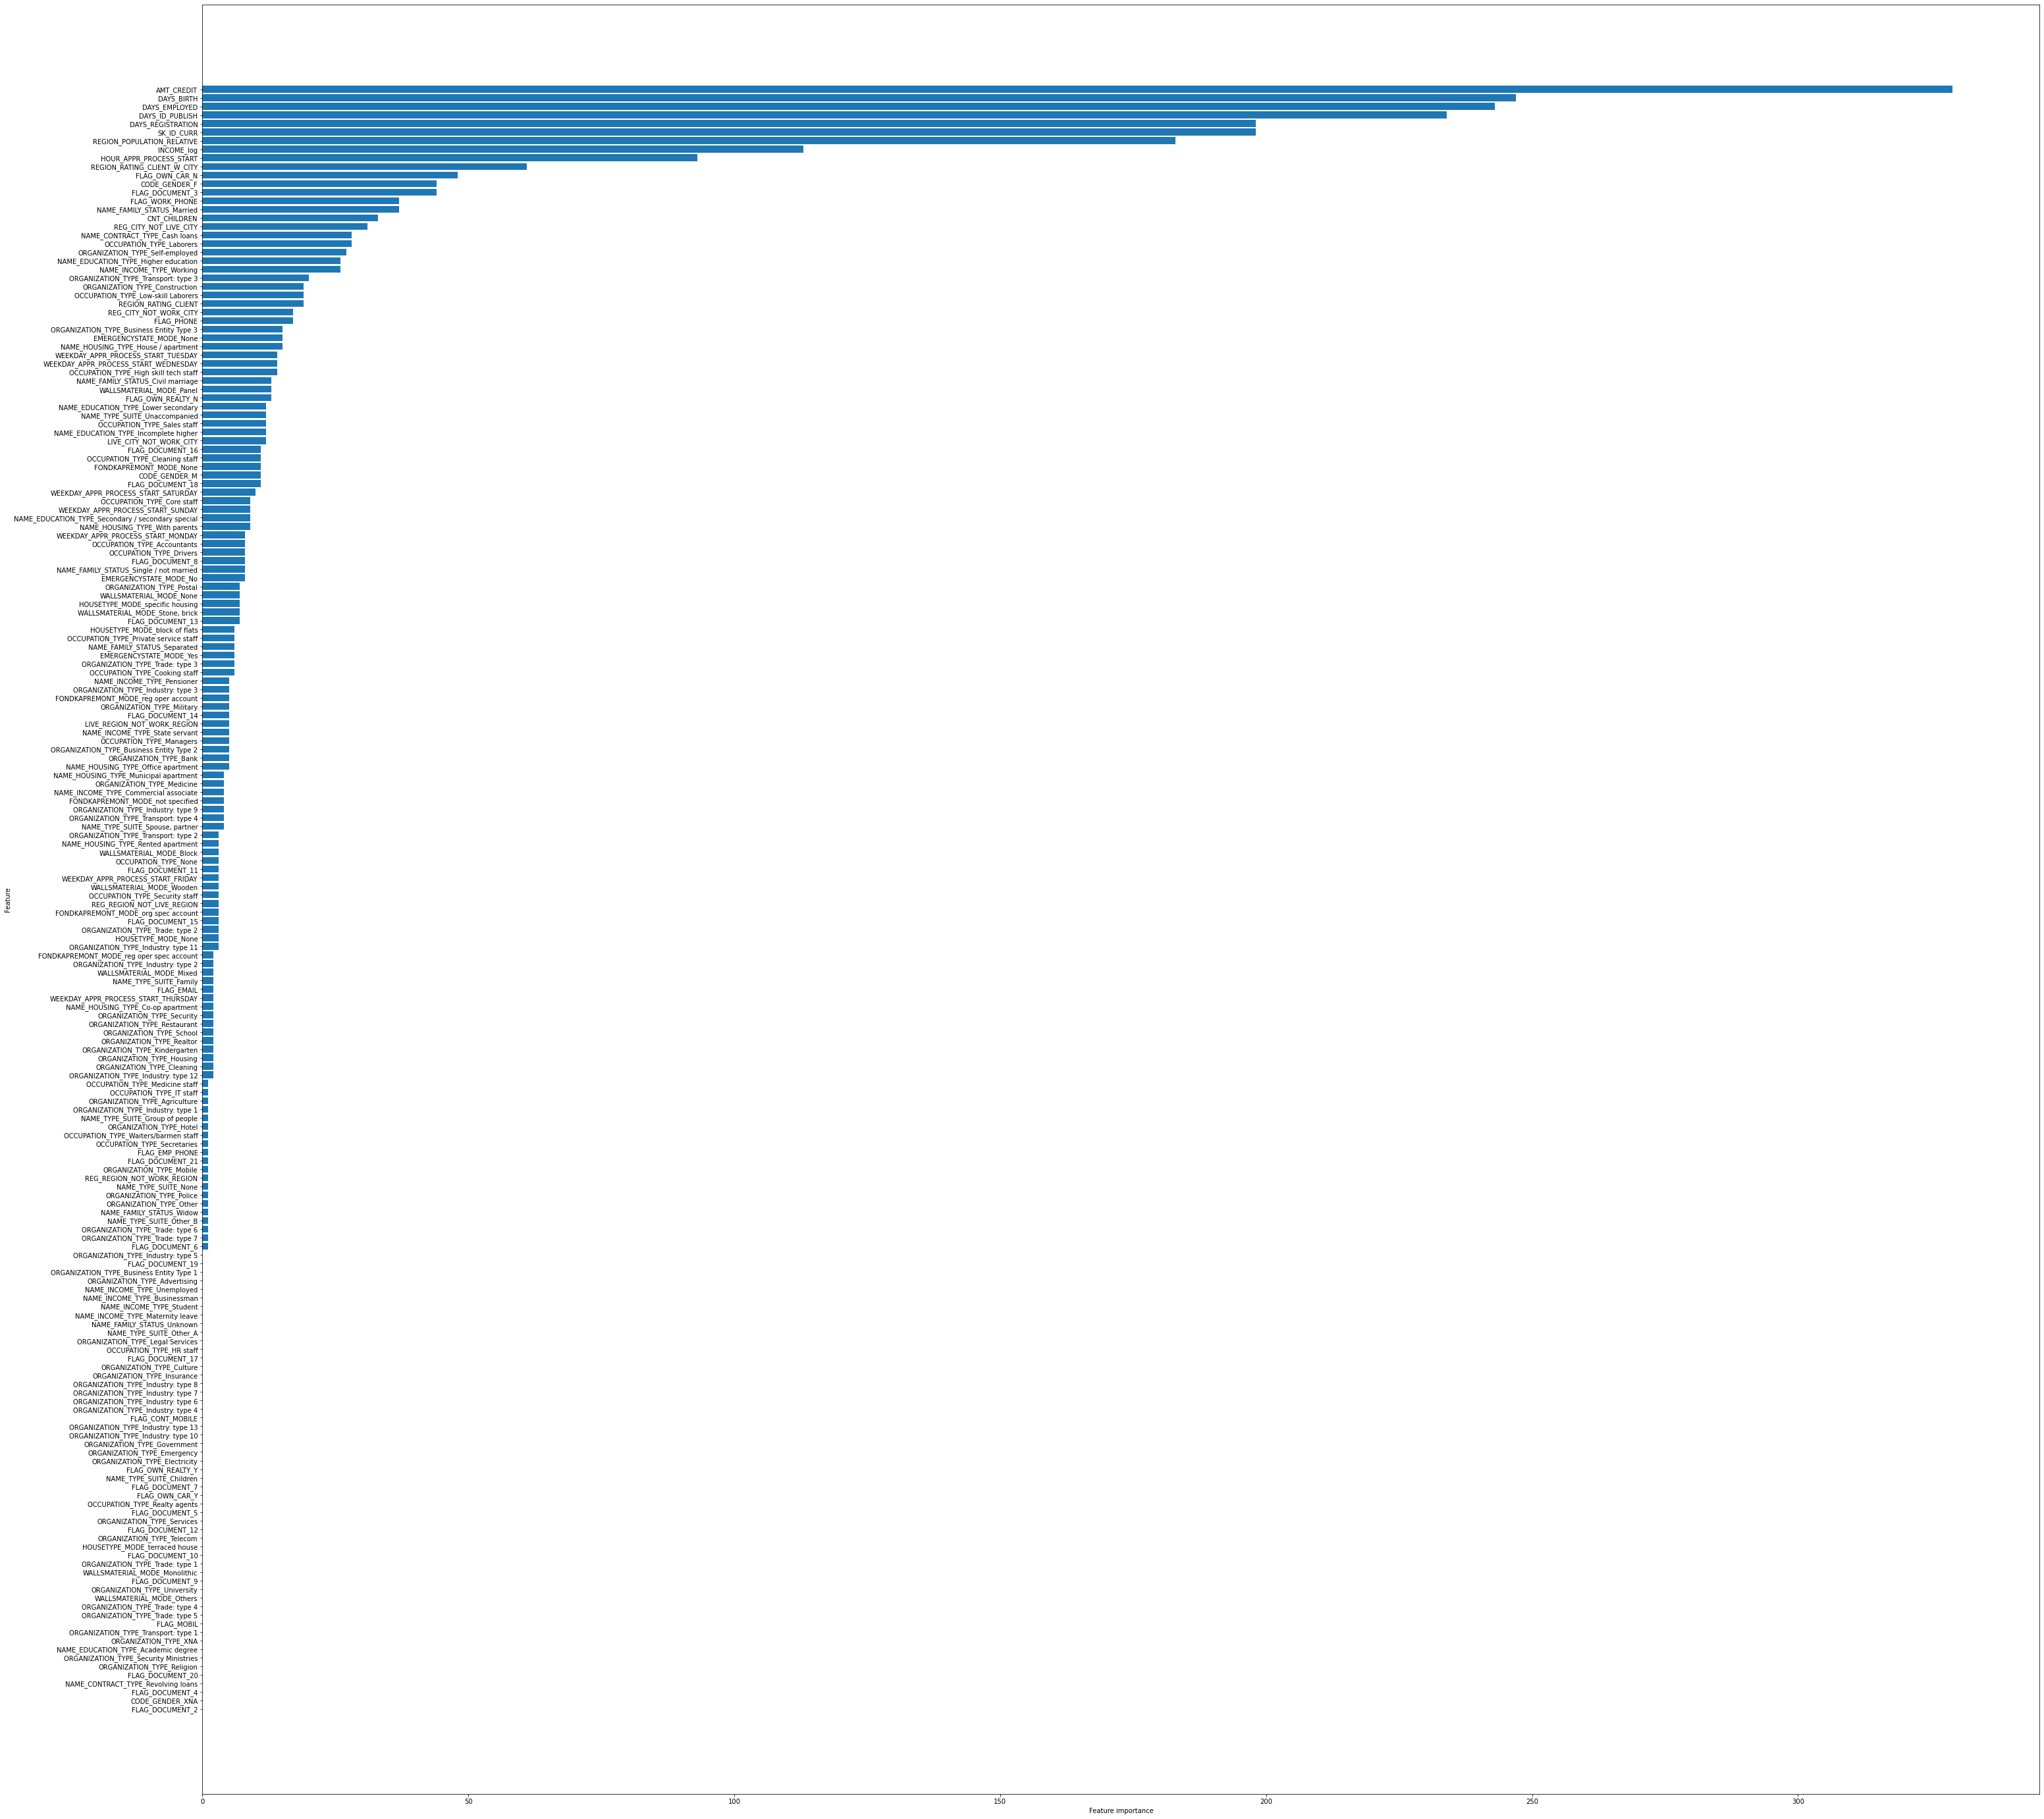

In [155]:
# 特徴量重要度の可視化
fig,ax = plt.subplots(figsize=(50,50
                              ))
plot_feature_importance(df_importance)

In [160]:
lgbm = df_importance[df_importance["importance"]>25]

In [163]:
lgbm["feature"].values

array(['AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'SK_ID_CURR', 'REGION_POPULATION_RELATIVE',
       'INCOME_log', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_OWN_CAR_N', 'CODE_GENDER_F',
       'FLAG_DOCUMENT_3', 'FLAG_WORK_PHONE', 'NAME_FAMILY_STATUS_Married',
       'CNT_CHILDREN', 'REG_CITY_NOT_LIVE_CITY',
       'NAME_CONTRACT_TYPE_Cash loans', 'OCCUPATION_TYPE_Laborers',
       'ORGANIZATION_TYPE_Self-employed',
       'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working'],
      dtype=object)

In [166]:
df_train3 = df_train2[['AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'SK_ID_CURR', 'REGION_POPULATION_RELATIVE',
       'INCOME_log', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_OWN_CAR_N', 'CODE_GENDER_F',
       'FLAG_DOCUMENT_3', 'FLAG_WORK_PHONE', 'NAME_FAMILY_STATUS_Married',
       'CNT_CHILDREN', 'REG_CITY_NOT_LIVE_CITY',
       'NAME_CONTRACT_TYPE_Cash loans', 'OCCUPATION_TYPE_Laborers',
       'ORGANIZATION_TYPE_Self-employed',
       'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working']]

In [167]:
df_train3

,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,SK_ID_CURR,REGION_POPULATION_RELATIVE,INCOME_log,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,FLAG_OWN_CAR_N,CODE_GENDER_F,FLAG_DOCUMENT_3,FLAG_WORK_PHONE,NAME_FAMILY_STATUS_Married,CNT_CHILDREN,REG_CITY_NOT_LIVE_CITY,NAME_CONTRACT_TYPE_Cash loans,OCCUPATION_TYPE_Laborers,ORGANIZATION_TYPE_Self-employed,NAME_EDUCATION_TYPE_Higher education,NAME_INCOME_TYPE_Working
0,406597.5,-9461,-637,-2120,-3648.0,100002,0.018801,12.218495,10,2,1,1,1,0,1,0,0,1,0,0,1,1
1,1293502.5,-16765,-1188,-291,-1186.0,100003,0.003541,12.506177,11,1,1,0,1,0,1,0,0,1,0,1,0,1
2,135000.0,-19046,-225,-2531,-4260.0,100004,0.010032,11.119883,9,2,0,0,0,1,1,0,0,1,0,0,1,1
3,312682.5,-19005,-3039,-2437,-9833.0,100006,0.008019,11.813030,17,2,1,1,1,0,1,0,0,1,0,0,0,1
4,513000.0,-19932,-3038,-3458,-4311.0,100007,0.028663,11.707670,11,2,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,254700.0,-9327,-236,-1982,-8456.0,456251,0.032561,11.967181,15,1,1,0,0,0,0,0,0,1,0,0,0,1
307507,269550.0,-20775,365243,-4090,-4388.0,456252,0.025164,11.184421,8,2,1,1,1,0,0,0,0,1,0,0,0,0
307508,677664.0,-14966,-7921,-5150,-6737.0,456253,0.005002,11.938193,9,3,1,1,1,0,0,0,0,1,0,0,1,1
307509,370107.0,-11961,-4786,-931,-2562.0,456254,0.005313,12.049419,9,2,1,1,1,0,1,0,1,1,1,0,0,0


In [168]:
X_train3,X_test3,y_train3,y_test3 =train_test_split(df_train3.values,
                 df_train['TARGET'].values,random_state=0)
sc3 = StandardScaler()
X_train3_st = sc3.fit_transform(X_train3)
X_test3_st = sc3.transform(X_test3)

In [170]:
lr = LogisticRegression(max_iter=100000)

In [171]:
lr.fit(X_train3_st,y_train3)

LogisticRegression(max_iter=100000)

In [172]:
y_p_3 = lr.predict_proba(X_test3_st)

In [174]:
roc_auc_score(y_test3,y_p_3[:,1])

0.6446782521541006

In [175]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train3_st, y_train3)
lgb_eval = lgb.Dataset(X_test3_st, y_test3, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 22
[LightGBM] [Info] Start training from score 0.081229
[1]	valid_0's rmse: 0.269639
[2]	valid_0's rmse: 0.269259
[3]	valid_0's rmse: 0.26892
[4]	valid_0's rmse: 0.268656
[5]	valid_0's rmse: 0.268429
[6]	valid_0's rmse: 0.268228
[7]	valid_0's rmse: 0.268041
[8]	valid_0's rmse: 0.267873
[9]	valid_0's rmse: 0.267718
[10]	valid_0's rmse: 0.267586
[11]	valid_0's rmse: 0.267479
[12]	valid_0's rmse: 0.267365
[13]	valid_0's rmse: 0.267254
[14]	valid_0's rmse: 0.267174
[15]	valid_0's rmse: 0.267088
[16]	valid_0's rmse: 0.267015
[17]	valid_0's rmse: 0.266943
[18]	valid_0's rmse: 0.266876
[19]	valid_0's rmse: 0.266807
[20]	valid_0's rmse: 0.266774


In [190]:
y_lgm = model.predict(X_test3_st)

In [191]:
roc_auc_score(y_test3,y_lgm)

0.6697930753280604

In [340]:
test = test.drop('AMT_INCOME_TOTAL',axis=1)

In [350]:

df['income_log'] = np.log(df['AMT_INCOME_TOTAL'])
df = df.drop('AMT_INCOME_TOTAL',axis=1)


In [351]:
new_df = pd.concat([df,test])

In [352]:
df_dummy = pd.get_dummies(new_df)

In [353]:
df_dummy.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,...,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1.0,0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,100003,0.0,0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,100004,0.0,0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0.0,0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0.0,0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [356]:
# 説明変数,目的変数 
X = df_dummy.drop('TARGET',axis=1).values # 説明変数(target以外の特徴量) 
y = df_dummy['TARGET'].values             # 目的変数(target) 

# トレーニングデータ,テストデータの分割 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2)

In [357]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',        # 目的 : 2クラス分類  
        'metric': {'binary_error'},   # 評価指標 : 誤り率(= 1-正答率) 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

[LightGBM] [Info] Number of positive: 19936, number of negative: 265068
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11670
[LightGBM] [Info] Number of data points in the train set: 285004, number of used features: 236
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.069950 -> initscore=-2.587459
[LightGBM] [Info] Start training from score -2.587459
[1]	valid_0's binary_error: 0.0686166
[2]	valid_0's binary_error: 0.0686166
[3]	valid_0's binary_error: 0.0686166
[4]	valid_0's binary_error: 0.0686166
[5]	valid_0's binary_error: 0.0686166
[6]	valid_0's binary_error: 0.0686166
[7]	valid_0's binary_error: 0.0686166
[8]	valid_0's binary_error: 0.0686166
[9]	valid_0's binary_error: 0.0686166
[10]	valid_0's binary_error: 0.0686166
[11]	valid_0's binary_error: 0.0686166
[12]	valid_0's 

In [358]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df_dummy.drop('TARGET',axis=1).columns) # 特徴量名のリスト(目的変数target以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
df_importance.head()

,feature,importance
29,EXT_SOURCE_3,0.078667
27,EXT_SOURCE_1,0.077000
28,EXT_SOURCE_2,0.064000
2,AMT_CREDIT,0.058667
6,DAYS_BIRTH,0.058333


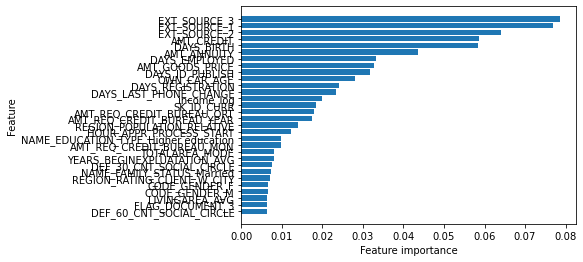

In [359]:
# 特徴量重要度の可視化
n_display = 30 # 上位30個に制限
plot_feature_importance(df_importance.iloc[:n_display,:])

In [360]:
df2 = df_importance.loc[:20,['feature']].values
df2 = df2.reshape(-1)


In [391]:
test = test[df2]
test.head()

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,AMT_CREDIT,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,income_log,SK_ID_CURR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START
0,0.159520,0.752614,0.789654,568800.0,-19241,20560.5,-2329,450000.0,-812,NaN,-5170.0,-1740.0,11.813030,100001,0.0,0.0,0.018850,18
1,0.432962,0.564990,0.291656,222768.0,-18064,17370.0,-4469,180000.0,-1623,NaN,-9118.0,0.0,11.502875,100005,0.0,3.0,0.035792,9
2,0.610991,NaN,0.699787,663264.0,-20038,69777.0,-4458,630000.0,-3503,5.0,-2175.0,-856.0,12.218495,100013,1.0,4.0,0.019101,14
3,0.612704,0.525734,0.509677,1575000.0,-13976,49018.5,-1866,1575000.0,-4208,NaN,-2000.0,-1805.0,12.660328,100028,0.0,3.0,0.026392,11
4,NaN,0.202145,0.425687,625500.0,-13040,32067.0,-2191,625500.0,-4262,16.0,-4000.0,-821.0,12.100712,100038,NaN,NaN,0.010032,5


In [390]:
df3 = df_dummy[df2]
df3.head()

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,AMT_CREDIT,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,income_log,SK_ID_CURR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START
0,0.139376,0.083037,0.262949,406597.5,-9461,24700.5,-637,351000.0,-2120,NaN,-3648.0,-1134.0,12.218495,100002,0.0,1.0,0.018801,10
1,NaN,0.311267,0.622246,1293502.5,-16765,35698.5,-1188,1129500.0,-291,NaN,-1186.0,-828.0,12.506177,100003,0.0,0.0,0.003541,11
2,0.729567,NaN,0.555912,135000.0,-19046,6750.0,-225,135000.0,-2531,26.0,-4260.0,-815.0,11.119883,100004,0.0,0.0,0.010032,9
3,NaN,NaN,0.650442,312682.5,-19005,29686.5,-3039,297000.0,-2437,NaN,-9833.0,-617.0,11.813030,100006,NaN,NaN,0.008019,17
4,NaN,NaN,0.322738,513000.0,-19932,21865.5,-3038,513000.0,-3458,NaN,-4311.0,-1106.0,11.707670,100007,0.0,0.0,0.028663,11


In [362]:
# 説明変数,目的変数 
X = df3.values # 説明変数(target以外の特徴量) 
y = df_dummy['TARGET'].values             # 目的変数(target) 

In [363]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

In [389]:
#平均で欠損値を穴埋め
X = imp.fit_transform(X)
X2 = pd.DataFrame(X)
X2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.139376,0.083037,0.262949,406597.5,-9461.0,24700.5,-637.0,351000.0,-2120.0,12.023741,-3648.0,-1134.0,12.218495,100002.0,0.000000,1.000000,0.018801,10.0
1,0.509350,0.311267,0.622246,1293502.5,-16765.0,35698.5,-1188.0,1129500.0,-291.0,12.023741,-1186.0,-828.0,12.506177,100003.0,0.000000,0.000000,0.003541,11.0
2,0.729567,0.501965,0.555912,135000.0,-19046.0,6750.0,-225.0,135000.0,-2531.0,26.000000,-4260.0,-815.0,11.119883,100004.0,0.000000,0.000000,0.010032,9.0
3,0.509350,0.501965,0.650442,312682.5,-19005.0,29686.5,-3039.0,297000.0,-2437.0,12.023741,-9833.0,-617.0,11.813030,100006.0,0.304399,1.911564,0.008019,17.0
4,0.509350,0.501965,0.322738,513000.0,-19932.0,21865.5,-3038.0,513000.0,-3458.0,12.023741,-4311.0,-1106.0,11.707670,100007.0,0.000000,0.000000,0.028663,11.0


In [365]:
corr = X2.corr()

<AxesSubplot:>

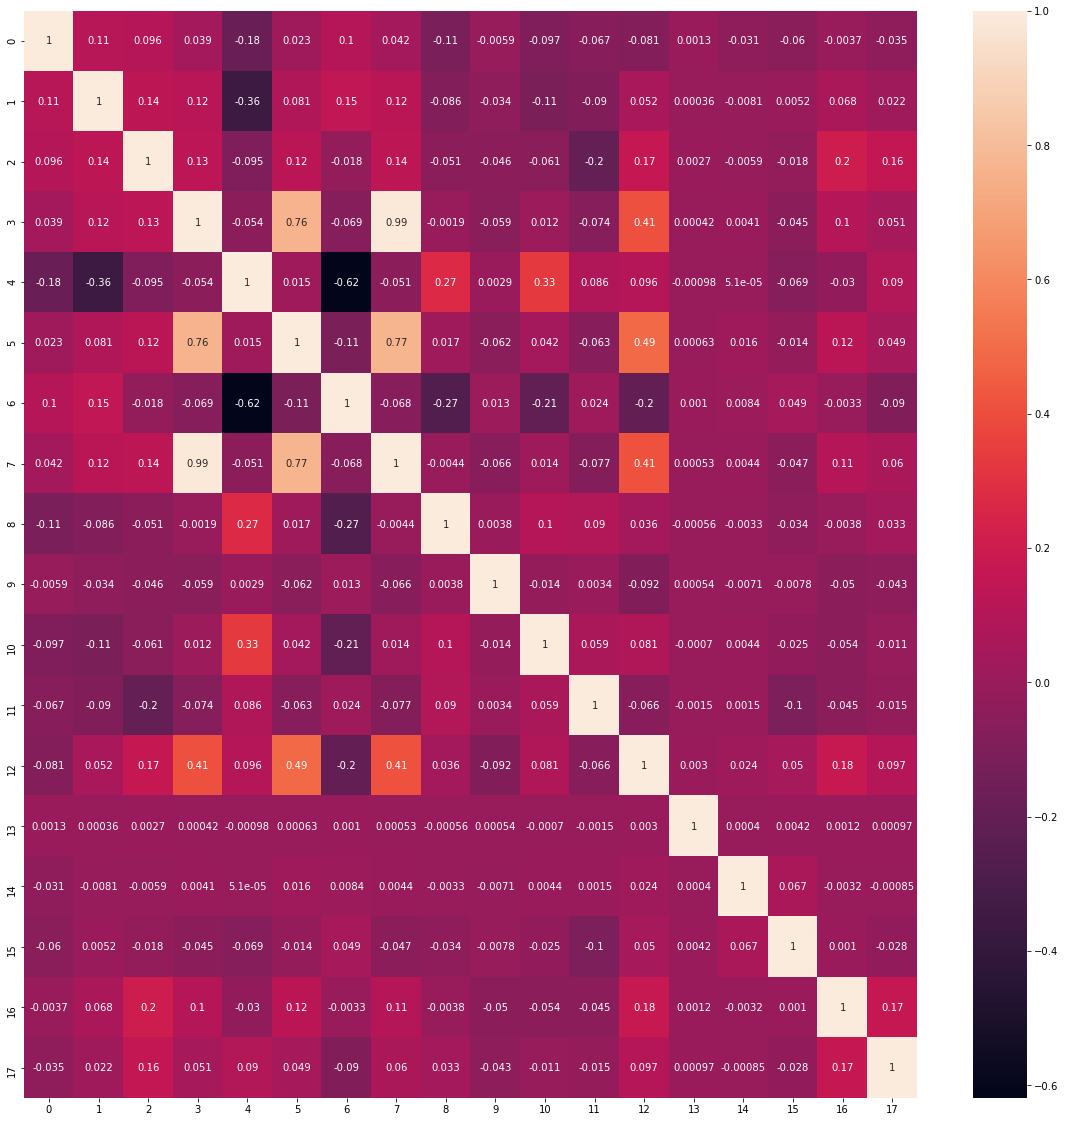

In [366]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [367]:
X2.columns[[7,5]]

Int64Index([7, 5], dtype='int64')

In [368]:
X3 = X2.drop(columns=X2.columns[[7,5]])
X3.shape

(356255, 16)

In [392]:
test = test.drop(columns=test.columns[[5,7]])
test.head()

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,income_log,SK_ID_CURR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START
0,0.159520,0.752614,0.789654,568800.0,-19241,-2329,-812,NaN,-5170.0,-1740.0,11.813030,100001,0.0,0.0,0.018850,18
1,0.432962,0.564990,0.291656,222768.0,-18064,-4469,-1623,NaN,-9118.0,0.0,11.502875,100005,0.0,3.0,0.035792,9
2,0.610991,NaN,0.699787,663264.0,-20038,-4458,-3503,5.0,-2175.0,-856.0,12.218495,100013,1.0,4.0,0.019101,14
3,0.612704,0.525734,0.509677,1575000.0,-13976,-1866,-4208,NaN,-2000.0,-1805.0,12.660328,100028,0.0,3.0,0.026392,11
4,NaN,0.202145,0.425687,625500.0,-13040,-2191,-4262,16.0,-4000.0,-821.0,12.100712,100038,NaN,NaN,0.010032,5


In [402]:
X4 = X3[:307511]
X_test = X3[307511:]

In [403]:
X_test2 = test.values
X_test2 = sc3.transform(X_test2)

In [404]:
X_train4,X_test4,y_train4,y_test4 =train_test_split(X4.values,
                 df['TARGET'].values,random_state=0)
sc4 = StandardScaler()
X_train4_st = sc3.fit_transform(X_train4)
X_test4_st = sc3.transform(X_test4)

In [405]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train4_st, y_train4)
lgb_eval = lgb.Dataset(X_test4_st, y_test4, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',        # 目的 : 2クラス分類  
        'metric': {'binary_error'},   # 評価指標 : 誤り率(= 1-正答率) 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

[LightGBM] [Info] Number of positive: 18734, number of negative: 211899
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2936
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081229 -> initscore=-2.425770
[LightGBM] [Info] Start training from score -2.425770
[1]	valid_0's binary_error: 0.0792294
[2]	valid_0's binary_error: 0.0792294
[3]	valid_0's binary_error: 0.0792294
[4]	valid_0's binary_error: 0.0792294
[5]	valid_0's binary_error: 0.0792294
[6]	valid_0's binary_error: 0.0792294
[7]	valid_0's binary_error: 0.0792294
[8]	valid_0's binary_error: 0.0792294
[9]	valid_0's binary_error: 0.0792294
[10]	valid_0's binary_error: 0.0792294
[11]	valid_0's binary_error: 0.0792294
[12]	valid_0's binary_error: 0.0792294
[13]	valid_0's binary_error: 0.0792294
[14

In [406]:
y_pre = model.predict(X_test4_st)

In [407]:
roc_auc_score(y_test4,y_pre)

0.7414865190260245

In [408]:
y_pre2 = model.predict(X_test2)
y_pre2.shape

(48744,)

In [409]:
sub2 = pd.DataFrame({'SK_ID_CURR':df_test["SK_ID_CURR"],'TARGET':y_pre2})

In [410]:
sub2.to_csv("submission3",index=False)

In [411]:
sub2

,SK_ID_CURR,TARGET
0,100001,0.026018
1,100005,0.061666
2,100013,0.023646
3,100028,0.040043
4,100038,0.152439
...,...,...
48739,456221,0.028206
48740,456222,0.055401
48741,456223,0.034538
48742,456224,0.069453


### 　kaggleは0.72277となった